<a href="https://colab.research.google.com/github/sofiagoldheart/ComputationalGeometry/blob/main/ID0205_Lab_3.06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[Teoría de grafos](https://sites.google.com/site/discretas27/unidad-5-introduccion-a-los-grafos)

La teoría de grafos es un tema muy antiguo; sin embargo, es utilizado en muchas aplicaciones modernas. 

* Sus ideas básicas fueron introducidas en el siglo XVIII por el matemático suizo Leonhard Euler.
* Los grafos son usados para resolver problemas en muchos campos, por ejemplo, se puede utilizar para diferenciar dos compuestos químicos con la misma fórmula molecular pero empleando distintas estructuras; para el caso de nuestra área de interés, un ejemplo es que los grafos pueden ser utilizados para establecer si dos computadoras están conectadas por un enlace de comunicaciones entre las  de redes de computadoras.

Esta es una introducción les brindará una descripción general rápida de las siguientes operaciones:

- Construir un gráfico
- Establecer atributos de nodos y bordes.
- Traza un gráfico usando matplotlib
- Guardar la trama como una imagen
- Exportar e importar un gráfico como un archivo ``.gml``

## Ejemplo-1

In [1]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.4 MB/s eta 0:00:00


In [2]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Construimos un grafo con 5 vertices
n_vertices = 5
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 4)]
grafito = ig.Graph(n_vertices, edges)

In [4]:
# imprime grafo actual en forma de estructura
print(grafito)

IGRAPH U--- 5 8 --
+ edges:
0 -- 1 2 3 4   1 -- 0 2 3 4   2 -- 0 1       3 -- 0 1 4     4 -- 0 1 3


In [5]:
# Atributos para el gráfico
grafito["titulo"] = "Pequeña Red Social"
grafito.vs["nombre"] = ["Daniel Cortinas", "Katy Archundia", "Ana Delgado", "Jose Vargas", "Juana Hilario"]
grafito.vs["genero"] = ["M", "F", "F", "M", "F"]
grafito.es["casado"] = [False, False, False, False, False, False, False, True]

In [6]:
# Atributos individuales
grafito.vs[1]["nombre"] = "Katy Archundia"
grafito.es[0]["casado"] = True

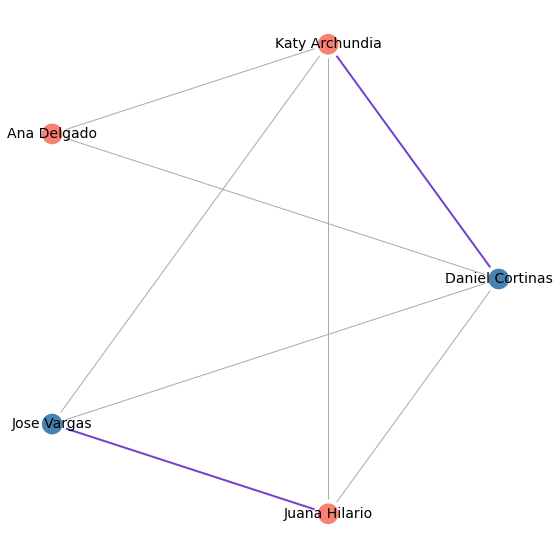

In [7]:
## Grafica con matplotlib
# Nota: los atributos se pueden configurar globalmente 
# p. ej.: vertex_size 
# o configurar individualmente mediante matrices
# p. ej.Ñ: vertex_color
figurota, ejote = plt.subplots(figsize=(10,10))
# utiliza plot de igraph
ig.plot(
    grafito,
    # target es una palabra reservada en igraph
    target=ejote,
    # imprimir nodos en un diseño circular
    layout="circle", 
    vertex_size=0.1,
    vertex_color=["steelblue" if genero == "M" else "salmon" for genero in grafito.vs["genero"]],
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label=grafito.vs["nombre"],
    vertex_label_size=14.0,
    edge_width=[2 if casado else 1 for casado in grafito.es["casado"]],
    edge_color=["#7142cf" if casado else "#AAA" for casado in grafito.es["casado"]]
)

plt.show()

In [8]:
# Guarda el gráfico como archivo de imágen 
figurota.savefig('red_social.png')
figurota.savefig('red_social.jpg')
figurota.savefig('red_social.pdf')

# Nota: Checa en tu folder (ícono de la izquierda)

In [9]:
# Exporta e importa gráfico como un archivo GML.
grafito.save("red_social.gml")
grafito = ig.load("red_social.gml")

# Nota: Checa en tu folder (ícono de la izquierda)

## Ejemplo-2

In [10]:
# Marco de datos
datos_accion = pd.DataFrame([
    ['dsj3239asadsa3', 'crearPagina', 'granProyecto'],
    ['2r09ej221sk2k5', 'editarPagina', 'granProyecto'],
    ['dsj3239asadsa3', 'editarPagina', 'granProyecto'],
    ['789dsadafj32jj', 'editarPagina', 'granProyecto'],
    ['oi32ncwosap399', 'editarPagina', 'granProyecto'],
    ['4r4320dkqpdokk', 'crearPagina', 'miniProyecto'],
    ['320eljl3lk3239', 'editarPagina', 'miniProyecto'],
    ['dsj3239asadsa3', 'editarPagina', 'miniProyecto'],
    ['3203ejew332323', 'crearPagina', 'privado'],
    ['3203ejew332323', 'editarPagina', 'privado'],
    ['40m11919332msa', 'crearPagina', 'privado2'],
    ['40m11919332msa', 'editarPagina', 'privado2'],
    ['dsj3239asadsa3', 'crearPagina', 'otraGranProyecto'],
    ['2r09ej221sk2k5', 'editarPagina', 'otraGranProyecto'],
    ],
    columns=['usuarioid', 'accion', 'proyecto'],
)

In [11]:
usuarios = datos_accion['usuarioid'].unique()
# utiliza pandas para crear marco de datos
matriz_adyacencia = pd.DataFrame(
    np.zeros((len(usuarios), len(usuarios)), np.int32),
    index=usuarios,
    columns=usuarios,
)

In [12]:
# imprime usuarios
print(usuarios)

['dsj3239asadsa3' '2r09ej221sk2k5' '789dsadafj32jj' 'oi32ncwosap399'
 '4r4320dkqpdokk' '320eljl3lk3239' '3203ejew332323' '40m11919332msa']


In [13]:
# Mestra el marco de datos
display(matriz_adyacencia)

,dsj3239asadsa3,2r09ej221sk2k5,789dsadafj32jj,oi32ncwosap399,4r4320dkqpdokk,320eljl3lk3239,3203ejew332323,40m11919332msa
dsj3239asadsa3,0,0,0,0,0,0,0,0
2r09ej221sk2k5,0,0,0,0,0,0,0,0
789dsadafj32jj,0,0,0,0,0,0,0,0
oi32ncwosap399,0,0,0,0,0,0,0,0
4r4320dkqpdokk,0,0,0,0,0,0,0,0
320eljl3lk3239,0,0,0,0,0,0,0,0
3203ejew332323,0,0,0,0,0,0,0,0
40m11919332msa,0,0,0,0,0,0,0,0


In [14]:
# usuarios de proyecto
for project, datos_accion in datos_accion.groupby('proyecto'):
    usuarios_proyecto = datos_accion['usuarioid'].values
    for i1, user1 in enumerate(usuarios_proyecto):
        for user2 in usuarios_proyecto[:i1]:
            matriz_adyacencia.at[user1, user2] += 1

In [15]:
# grafo con matriz de adyacencia
grafito = ig.Graph.Weighted_Adjacency(matriz_adyacencia, mode='plus')

In [16]:
# imprimir nodos en un diseño circular
layout = grafito.layout('circle')

In [17]:
# 
tamanio_vertice = grafito.closeness()
tamanio_vertice = [0.5 * v**2 if not np.isnan(v) else 0.05 for v in tamanio_vertice]

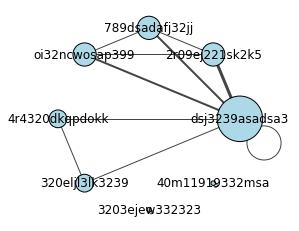

In [18]:
#
fig, ax = plt.subplots()
ig.plot(
    grafito,
    target=ax,
    layout=layout,
    vertex_label=grafito.vs['name'],
    vertex_color="lightblue",
    vertex_size=tamanio_vertice,
    edge_width=grafito.es["weight"],
)
plt.show()

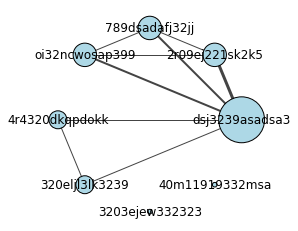

In [19]:
#
grafito = grafito.simplify(combine_edges='last') # 'first'

fig, ax = plt.subplots()
ig.plot(
    grafito,
    target=ax,
    layout=layout,
    vertex_label=grafito.vs['name'],
    vertex_color="lightblue",
    vertex_size=tamanio_vertice,
    edge_width=grafito.es["weight"],
)
plt.show()

### Ejercicio

* Crea una pequeña red social con nombres de tus amigos utilizando el ejemplo 1.






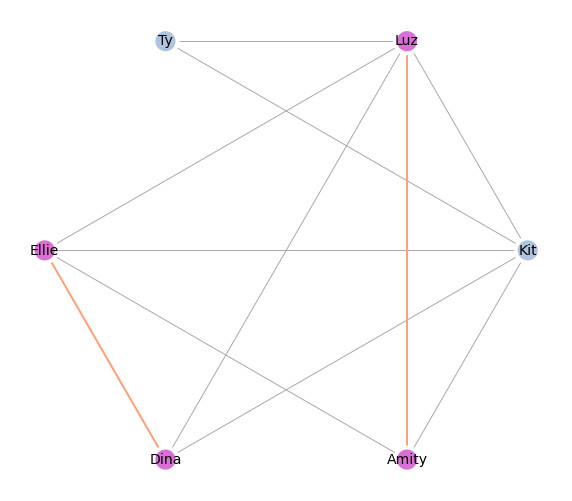

In [20]:
import igraph as ig
import matplotlib.pyplot as plt

# Construimos un grafo con 6 vertices
n_vertices = 6
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (3, 4), (3, 5)]
grafito = ig.Graph(n_vertices, edges)

# Atributos para el gráfico (he puesto nombres ficticios)
grafito["titulo"] = "Pequeña Red Social"
grafito.vs["nombre"] = ["Kit", "Luz", "Ty", "Ellie", "Dina", "Amity"]
grafito.vs["genero"] = ["M", "F", "M", "F", "F", "F"]
grafito.es["casado"] = [False, False, False, False, False, False, False, False, True, True, False]

# Atributos individuales
grafito.vs[1]["nombre"] = "Luz"
grafito.es[8]["casado"] = True
grafito.es[9]["casado"] = True

## Grafica con matplotlib
figurota, ejote = plt.subplots(figsize=(10,10))

# utiliza plot de igraph
ig.plot(
    grafito,
    # target es una palabra reservada en igraph
    target=ejote,
    # imprimir nodos en un diseño circular
    layout="circle", 
    vertex_size=0.1,
    vertex_color=["lightsteelblue" if genero == "M" else "orchid" for genero in grafito.vs["genero"]],
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label=grafito.vs["nombre"],
    vertex_label_size=14.0,
    edge_width=[2 if casado else 1 for casado in grafito.es["casado"]],
    edge_color=["lightsalmon" if casado else "#AAA" for casado in grafito.es["casado"]]
)

plt.show()

* Crea un proyecto utilizando el ejemplo 2 y elementos de esta asignatura:
  - Nombres de unidades, secciones, notebooks, utiliza claves de proyectos como por ejemplo; ID0205_02032023-1.

['ID0205_1.01_02032023-1' 'ID0205_1.02_02032023-1'
 'ID0205_1.03_02032023-1' 'ID0205_1.04_02032023-1'
 'ID0205_1.05_02032023-1']


,ID0205_1.01_02032023-1,ID0205_1.02_02032023-1,ID0205_1.03_02032023-1,ID0205_1.04_02032023-1,ID0205_1.05_02032023-1
ID0205_1.01_02032023-1,0,0,0,0,0
ID0205_1.02_02032023-1,0,0,0,0,0
ID0205_1.03_02032023-1,0,0,0,0,0
ID0205_1.04_02032023-1,0,0,0,0,0
ID0205_1.05_02032023-1,0,0,0,0,0


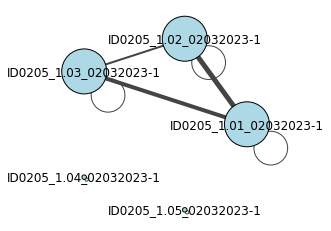

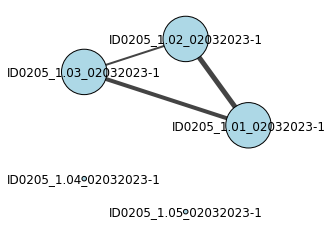

In [21]:
# Marco de datos
datos_accion = pd.DataFrame([ 
    ['ID0205_1.01_02032023-1', 'crearPagina', 'granProyecto'],
    ['ID0205_1.02_02032023-1', 'editarPagina', 'granProyecto'],
    ['ID0205_1.01_02032023-1', 'editarPagina', 'granProyecto'],
    ['ID0205_1.02_02032023-1', 'editarPagina', 'granProyecto'],
    ['ID0205_1.03_02032023-1', 'editarPagina', 'granProyecto'],
    ['ID0205_1.03_02032023-1', 'crearPagina', 'miniProyecto'],
    ['ID0205_1.03_02032023-1', 'editarPagina', 'miniProyecto'],
    ['ID0205_1.01_02032023-1', 'editarPagina', 'miniProyecto'],
    ['ID0205_1.04_02032023-1', 'crearPagina', 'privado'],
    ['ID0205_1.04_02032023-1', 'editarPagina', 'privado'],
    ['ID0205_1.05_02032023-1', 'crearPagina', 'privado2'],
    ['ID0205_1.05_02032023-1', 'editarPagina', 'privado2'],
    ['ID0205_1.01_02032023-1', 'crearPagina', 'otraGranProyecto'],
    ['ID0205_1.02_02032023-1', 'editarPagina', 'otraGranProyecto'],
    ],
    columns=['usuarioid', 'accion', 'proyecto'],
)
usuarios = datos_accion['usuarioid'].unique()
# utiliza pandas para crear marco de datos
matriz_adyacencia = pd.DataFrame(
    np.zeros((len(usuarios), len(usuarios)), np.int32),
    index=usuarios,
    columns=usuarios,
)
# imprime usuarios
print(usuarios)
# Mestra el marco de datos
display(matriz_adyacencia)
# usuarios de proyecto
for project, datos_accion in datos_accion.groupby('proyecto'):
    usuarios_proyecto = datos_accion['usuarioid'].values
    for i1, user1 in enumerate(usuarios_proyecto):
        for user2 in usuarios_proyecto[:i1]:
            matriz_adyacencia.at[user1, user2] += 1
# grafo con matriz de adyacencia
grafito = ig.Graph.Weighted_Adjacency(matriz_adyacencia, mode='plus')
# imprimir nodos en un diseño circular
layout = grafito.layout('circle')
# 
size_vertice = grafito.closeness()
size_vertice = [0.5 * v**2 if not np.isnan(v) else 0.05 for v in size_vertice]
#
fig, ax = plt.subplots()
ig.plot(
    grafito,
    target=ax,
    layout=layout,
    vertex_label=grafito.vs['name'],
    vertex_color="lightblue",
    vertex_size=size_vertice,
    edge_width=grafito.es["weight"],
)
plt.show()
#
grafito = grafito.simplify(combine_edges='last') # 'first'

fig, ax = plt.subplots()
ig.plot(
    grafito,
    target=ax,
    layout=layout,
    vertex_label=grafito.vs['name'],
    vertex_color="lightblue",
    vertex_size=size_vertice,
    edge_width=grafito.es["weight"],
)
plt.show()